### Step 0: Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Set 1: Data Cleaning and Exploration
#####      Step 1: Load the data

In [15]:
df = pd.read_csv('VideoGameSales.csv') # Load the video game sales dataset from a CSV file
print(df.head())  # Display the first few rows of the dataset


   Rank                           Name                      basename  \
0     1                     Wii Sports                    wii-sports   
1     2              Super Mario Bros.              super-mario-bros   
2     3                 Mario Kart Wii                mario-kart-wii   
3     4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4     5              Wii Sports Resort             wii-sports-resort   

      Genre ESRB_Rating Platform         Publisher         Developer  \
0    Sports           E      Wii          Nintendo      Nintendo EAD   
1  Platform         NaN      NES          Nintendo      Nintendo EAD   
2    Racing           E      Wii          Nintendo      Nintendo EAD   
3   Shooter         NaN       PC  PUBG Corporation  PUBG Corporation   
4    Sports           E      Wii          Nintendo      Nintendo EAD   

   VGChartz_Score  Critic_Score  ...  NA_Sales  PAL_Sales  JP_Sales  \
0             NaN           7.7  ...       NaN        NaN      

##### Step 2: Data summary

In [16]:
print(df.info())  # Display information about the dataset, including column names and non-null counts
print(df.describe())  # Generate descriptive statistics of the numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [5]:
# Handle missing values
df_cleaned = df.dropna(subset=['Global_Sales', 'Critic_Score', 'User_Score'])

##### Step 3: Visualize data distribution

C:\Users\Z Y B S Medical\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Z Y B S Medical\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Z Y B S Medical\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



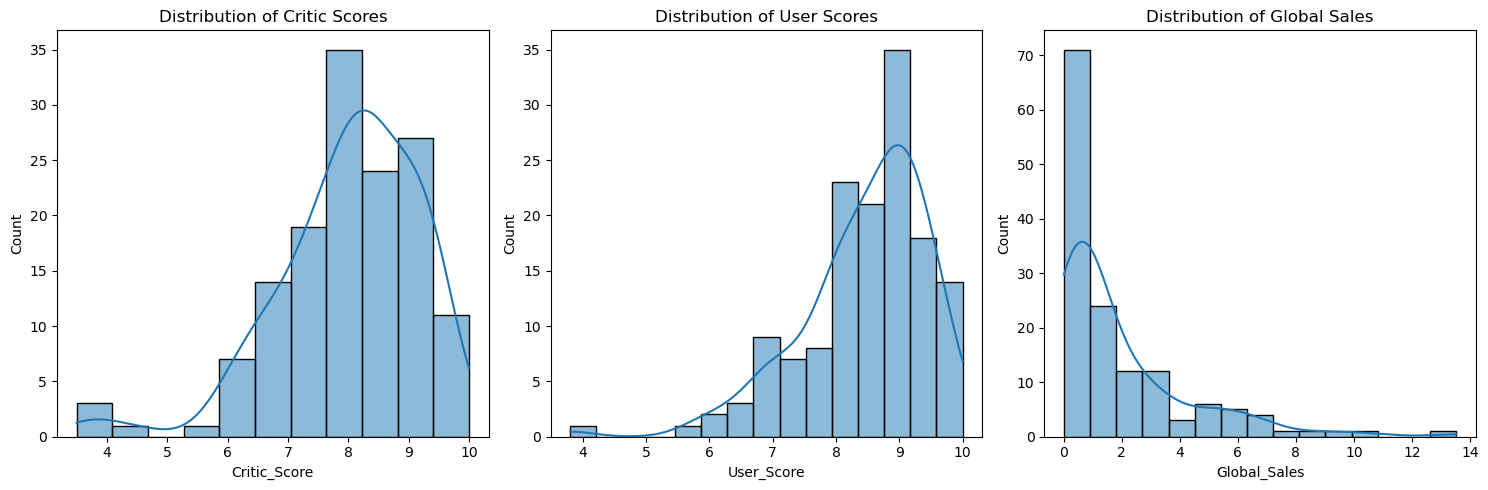

In [17]:
plt.figure(figsize=(15, 5))  # Create a figure with specified size


# Create histograms for Critic Score, User Score, and Global Sales
plt.subplot(131)
sns.histplot(df_cleaned['Critic_Score'], kde=True)
plt.title('Distribution of Critic Scores')

plt.subplot(132)
sns.histplot(df_cleaned['User_Score'], kde=True)
plt.title('Distribution of User Scores')

plt.subplot(133)
sns.histplot(df_cleaned['Global_Sales'], kde=True)
plt.title('Distribution of Global Sales')

plt.tight_layout() # Adjust the layout to prevent overlap
plt.show() # Display the plot

### Set 2: Basic Grouping and Analysis

##### Step 1: Top Genres by Sales

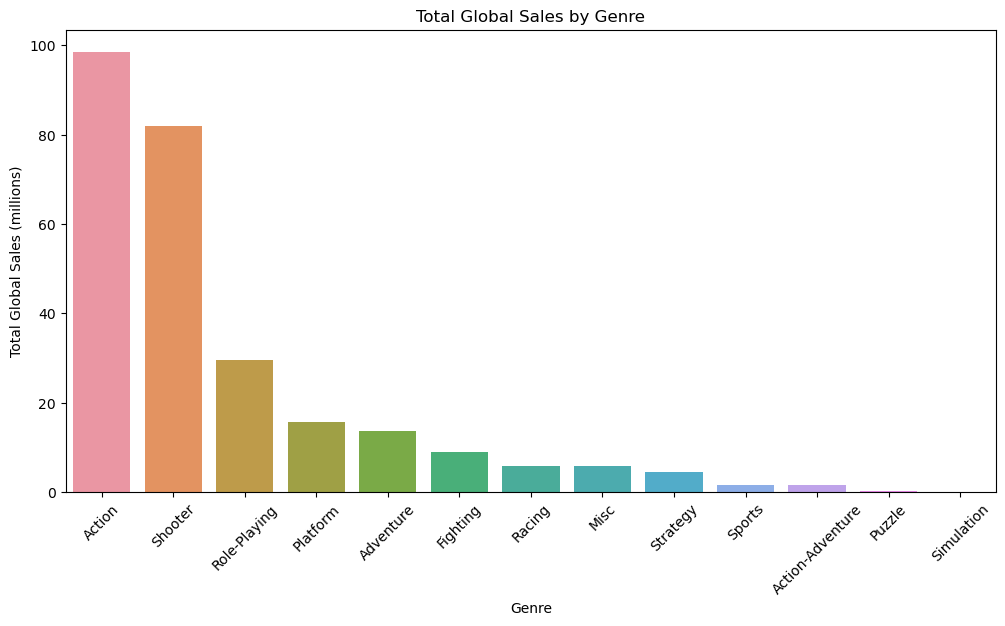

In [18]:
# Group data by Genre and calculate total Global Sales for each genre
genre_sales = df_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create a bar plot of total sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)   # Rotate x-axis labels for better readability
plt.show()

##### Step 2: Correlation between Scores and Sales

In [19]:
# Calculate the correlation coefficient between Critic Score and Global Sales
correlation = df_cleaned['Critic_Score'].corr(df_cleaned['Global_Sales'])
print(f"Correlation between Critic Score and Global Sales: {correlation:.2f}")

Correlation between Critic Score and Global Sales: 0.50


##### Step 3: Sales Over Time

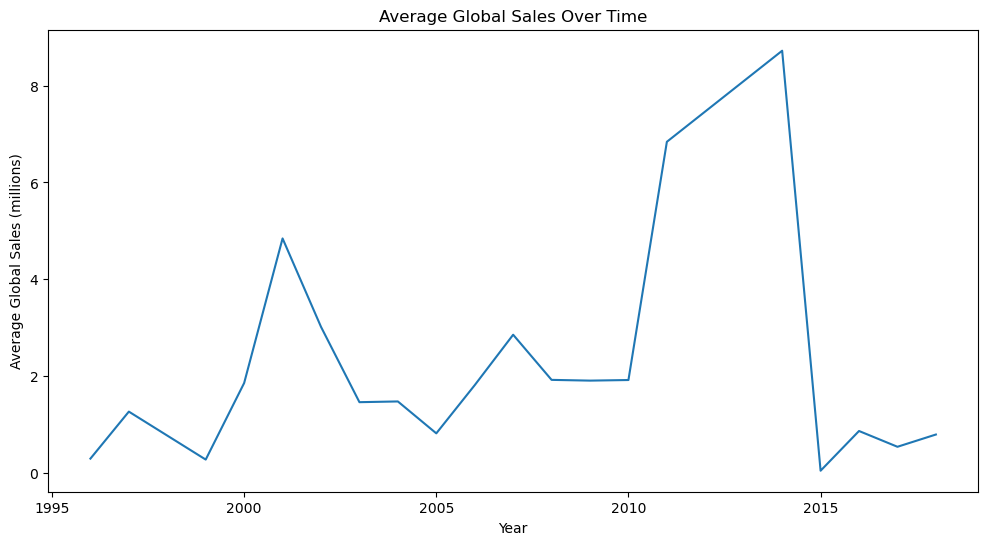

In [20]:
# Calculate average Global Sales for each year
yearly_sales = df_cleaned.groupby('Year')['Global_Sales'].mean()

# Create a line plot of average sales over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values)
plt.title('Average Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (millions)')
plt.show()

#### Set 3: Advanced Analysis and Visualization

##### Step 1: Platform Comparison (for a specific genre, e.g., 'Action')

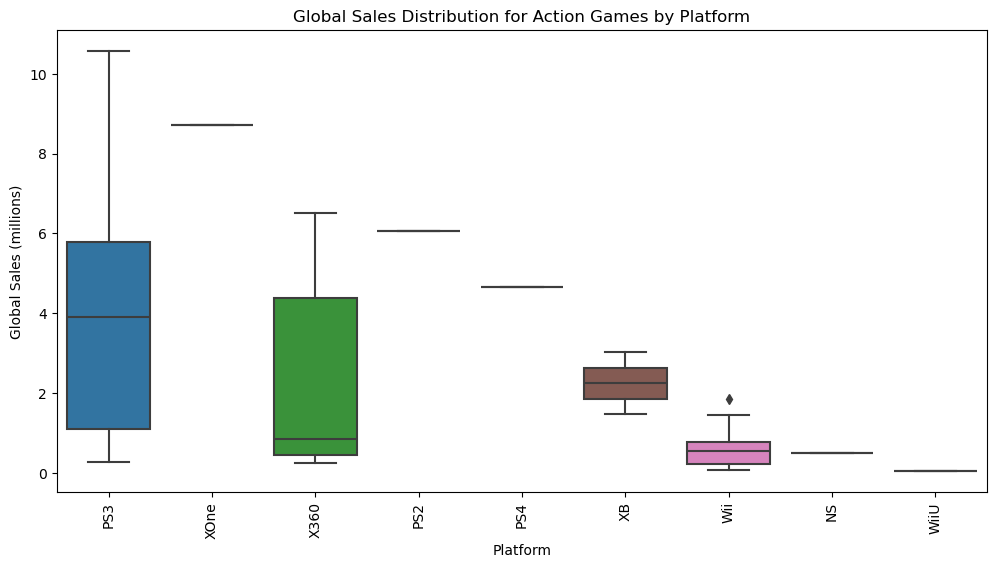

In [22]:
# Filter the dataset for Action games
action_games = df_cleaned[df_cleaned['Genre'] == 'Action']

# Create a box plot to compare Global Sales across different platforms for Action games
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=action_games)
plt.title('Global Sales Distribution for Action Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

##### Step 2: Predicting Sales

Mean Squared Error: 2.85
R-squared: 0.37


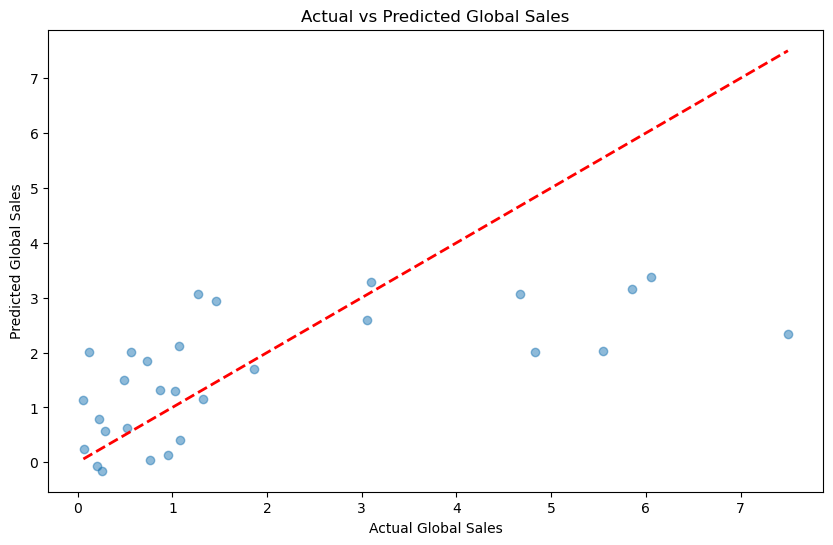

In [23]:
# Prepare features (X) and target variable (y) for the prediction model
X = df_cleaned[['Critic_Score', 'User_Score']]
y = df_cleaned['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()

##### Step 3: Interactive Visualization (Bonus)

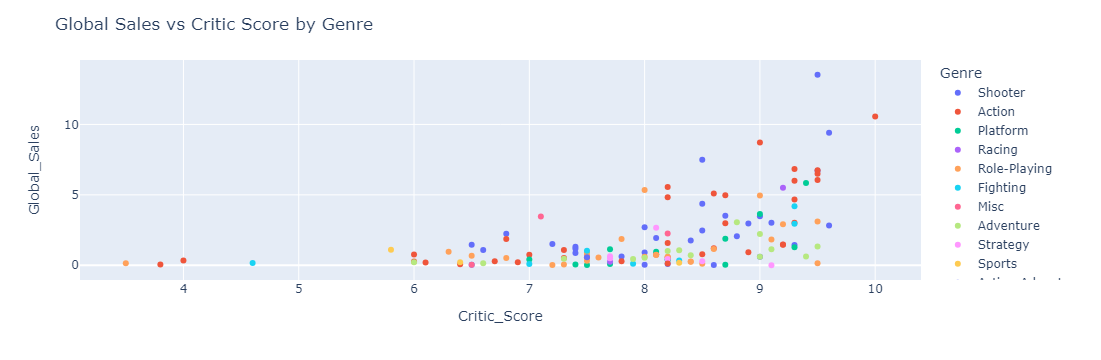

In [24]:
# For this step, I would typically use libraries like Plotly or Bokeh.
# Here I'm using Plotly:

# Create an interactive scatter plot using Plotly
import plotly.express as px
fig = px.scatter(df_cleaned, x='Critic_Score', y='Global_Sales', color='Genre',
                 hover_data=['Name', 'Platform', 'Year'])
fig.update_layout(title='Global Sales vs Critic Score by Genre')
fig.show()